# Programa para plotar precipitacao acumulada
## Simulacao modelo BRAMS
## MERGE (produto de precipitação por satelite do CPTEC/INPE)
## Pluviometros da ANA, CEMADEN, estacoes INMET e IAG
### Obs: Precipitacao acumulada pelo MERGE foi usada apenas no segundo evento na versao corrigida da tese devido a baixa quantidade de estacoes com dados disponiveis para o dia 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import xarray as xr
from shapely.geometry.polygon import LinearRing

In [2]:
def plot_SP_map(grid_spc=5, extent=[-47.5056, -45.5064, -24.4774, -22.6414]):

    proj = cartopy.crs.PlateCarree(central_longitude=-47.09)
    trans = cartopy.crs.PlateCarree()
    fig, ax = plt.subplots(figsize=(5, 6), facecolor='w', subplot_kw=dict(projection=proj))
    ax.set_extent(extent, crs=trans)
    grid_spc_lat=0.5
    grid_spc=0.5
    shapename_SP = 'file.shp'

    resol = '10m'  # use data at this scale
    land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
            scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
    ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
            scale=resol, edgecolor='none', facecolor=cfeature.COLORS['water'])
    ax.add_feature(land, linewidth=1.2 , facecolor='darkgrey', edgecolor='black')
    ax.add_feature(ocean, linewidth=1.2, edgecolor='black')
    stt_prv = cartopy.feature.NaturalEarthFeature(category='cultural', 
              name='admin_1_states_provinces_lines',
              scale='10m',facecolor='white')
    ax.add_feature(stt_prv, linewidth=1.2, facecolor='darkgrey', edgecolor='k', alpha=1)
    ax.add_geometries(shpreader.Reader(shapename_SP).geometries(), trans,
        linewidth=1.2, facecolor='darkgrey', edgecolor='black')
    gl = ax.gridlines(crs=trans, xlocs=np.arange(-180, 181, grid_spc),
                      ylocs=np.arange(-80, 90, grid_spc_lat), draw_labels=True)
 
    gl.right_labels = gl.top_labels = False
    gl.xlines = False
    gl.ylines = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    
    return fig, ax, trans

# Leitura dos dados

In [3]:
ds_merge = xr.open_dataset('file.nc')
ds_brams = xr.open_dataset('file.nc')
ds_pluv = pd.read_table('file.txt', sep='\s+')

# Plot precipitacao acumulada simulada BRAMS

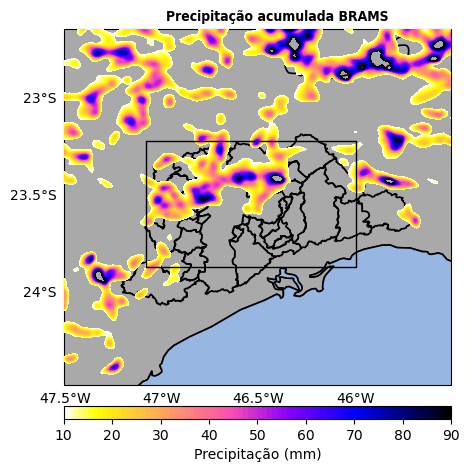

In [24]:
fig, ax, trans = plot_SP_map()
clevs_rain = np.arange(10,91,1)
cmap = plt.get_cmap('gnuplot2')
ticks=[10,20,30,40,50,60,70,80,90]
rain_cont = ax.contourf(
        ds_brams['lon'], ds_brams['lat'], ds_brams['precip'], 
        clevs_rain, extend='neither', transform=trans, alpha=1.0,zorder=3, cmap=cmap.reversed()) 
fig.colorbar(rain_cont, spacing='uniform', ticks=ticks,  extendrect=True,
              label='Precipitação (mm)', orientation='horizontal', shrink=1.0,
              aspect=30, pad=0.045)
plt.title('Precipitação acumulada BRAMS', weight='bold', stretch='condensed',
              size='medium', position=(0.55, 1))
lons = [-47.08, -47.08, -46.0, -46.0]
lats = [-23.22, -23.87, -23.87, -23.22]
ring = LinearRing(list(zip(lons, lats)))
# Adiciona um retangulo mostrando a regiao em que os indices estatisticos foram calculados para validar a precipitacao
ax.add_geometries([ring], cartopy.crs.PlateCarree(), facecolor='none', edgecolor='black', zorder=3)
plt.savefig('PrecipTotal_Control', dpi=300, bbox_inches='tight')
plt.show()

# Plot precipitacao acumulada MERGE

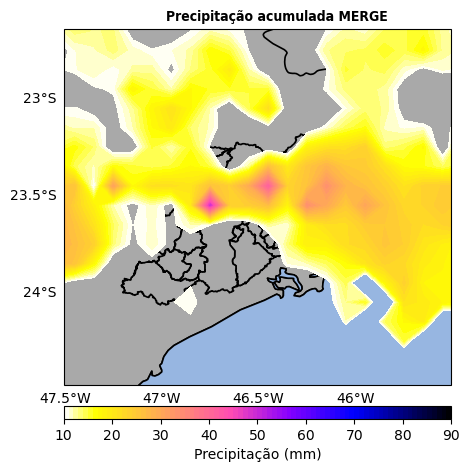

In [25]:
fig, ax, trans = plot_SP_map()
clevs_rain = np.arange(10,91,1)
cmap = plt.get_cmap('gnuplot2')
ticks=[10,20,30,40,50,60,70,80,90]
rain_cont = ax.contourf(
        ds_merge['lon'], ds_merge['lat'], ds_merge['precip'], clevs_rain, 
        extend='neither', transform=trans, alpha=1.0,zorder=2, cmap=cmap.reversed()) 
fig.colorbar(rain_cont, spacing='uniform', ticks=ticks,  extendrect=True,
              label='Precipitação (mm)', orientation='horizontal', shrink=1.0,
              aspect=30, pad=0.045)
plt.title('Precipitação acumulada MERGE', weight='bold', stretch='condensed',
              size='medium', position=(0.55, 1))
#plt.savefig('PrecipTotal_MERGE', dpi=300, bbox_inches='tight')
plt.show()

# Plot precipitacao acumulada pluviometros

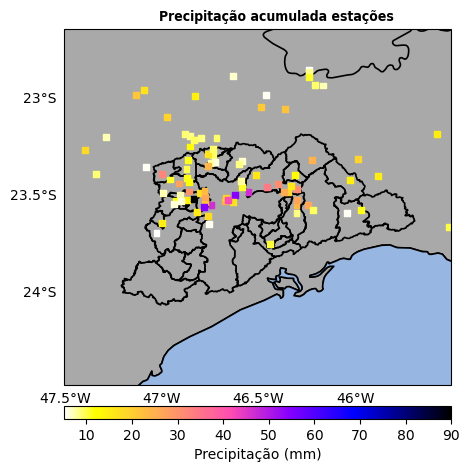

In [26]:
fig, ax, trans = plot_SP_map()
cmap = plt.get_cmap('gnuplot2')
plot_dados = ax.scatter(
    x=ds_pluv.loc[ds_pluv['Chuva']>=5.0]["Lon"],
    y=ds_pluv.loc[ds_pluv['Chuva']>=5.0]["Lat"],
    c=ds_pluv.loc[ds_pluv['Chuva']>=5.0]["Chuva"], cmap=cmap.reversed(), 
    marker='s',
    vmin = 5, vmax= 90,
    s=18,
    zorder=2,
    alpha=1,
    transform=trans
)
fig.colorbar(plot_dados, spacing='uniform',label='Precipitação (mm)',
                 orientation='horizontal', shrink=1.0,
                 aspect=30, pad=0.045)
plt.title('Precipitação acumulada estações', weight='bold', stretch='condensed',
              size='medium', position=(0.55, 1))
#plt.savefig(('Precip5mm_grade3_ingles.png'), dpi=300, bbox_inches='tight')
plt.show()

In [4]:
import geopandas as gpd
import shapely.vectorized

### Plot da precipitação acumulada pelos pluviometros apenas dentro da RMSP (aplicação de máscara no plot) 
#### Obs: Nao foi utilizado na tese

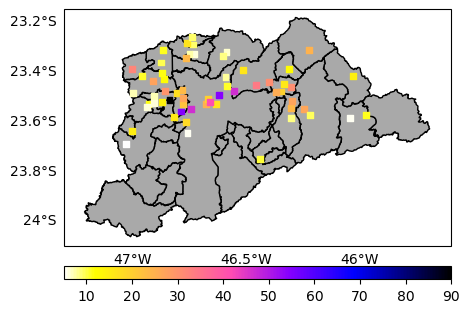

In [5]:
proj = cartopy.crs.PlateCarree(central_longitude=-46.5)
trans = cartopy.crs.PlateCarree()
fig, ax = plt.subplots(figsize=(5, 6), facecolor='w', subplot_kw=dict(projection=proj))
extent=[-47.3, -45.6, -24.10, -23.15]
ax.set_extent(extent, crs=trans)
grid_spc_lat=0.2
grid_spc=0.5
gdf = gpd.read_file('file.shp')
mask = shapely.vectorized.contains(gdf.dissolve().geometry.item(), ds_pluv.loc[ds_pluv['Chuva']>=5.0]["Lon"], 
                                   ds_pluv.loc[ds_pluv['Chuva']>=5.0]["Lat"])
gl = ax.gridlines(crs=trans, xlocs=np.arange(-180, 181, grid_spc),
                    ylocs=np.arange(-80, 90, grid_spc_lat), draw_labels=True)
gl.top_labels = gl.right_labels = False
gl.xlines = False
gl.ylines = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
cmap = plt.get_cmap('gnuplot2')
plot_dados = ax.scatter(
    x=ds_pluv.loc[ds_pluv['Chuva']>=5.0]["Lon"],
    y=ds_pluv.loc[ds_pluv['Chuva']>=5.0]["Lat"], 
    c=np.where(mask, ds_pluv.loc[ds_pluv['Chuva']>=5.0]['Chuva'], np.nan), cmap=cmap.reversed(),
    marker='s',
    vmin = 5, vmax= 90,
    s=18,
    zorder=2,
    alpha=1,
    transform=trans
)
fig.colorbar(plot_dados, spacing='uniform',
                 orientation='horizontal', shrink=1.0,
                 aspect=30, pad=0.045)
gdf.plot(ax=ax, color='darkgrey', edgecolor='k', transform=trans)
#plt.savefig("PrecipTotalRMSP", dpi=300, bbox_inches='tight')
plt.show()